# Project Title (Topic):_____
#### Group members (Section 003):
##### Jingyuan Liu 69763183 
##### Jinyi Wu 28812972
##### Cici Liu 77155471
##### Zefan Liu 17237355

<img src="https://m.media-amazon.com/images/G/15/gc/designs/livepreview/amazon_dkblue_noto_email_v2016_ca-main._CB468775011_.png" />

## Introduction:
Online shopping has been a prevalent behavior worldwide, and how prices and sales volume of online goods are associated with consumer behaviors and profit optimization has also become a popular topic in both economics and machine learning. In particular, with traditional economic models, we may ignore some important lurking information behind the data, such as what dominates the variances between sale information of goods, how these goods are naturally clustered, and how people’s rating on a good affects the discounted price. Insights into these topics may help us reveal the deeper economic pattern of selling and purchasing in online shopping.

This project aims to study the impact of consumer behavior, prices, and sales volume on product sales and profit optimization in online shopping. We choose the ["Amazon Sales Dataset" from Kaggle](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset), which contains over 1K+ ratings and reviews for Amazon products listed on the official website of Amazon India. This dataset provides credible and valid data and has very few missing values. It contains a category variable and several useful numerical variables such as discounted price, actual price, rating, and the number of ratings. The dataset provides insight into the online shopping market and consumer behaviors that can help us uncover deep economic patterns in online sales and purchases.

## Preliminary Analysis:

#### Import useful packages, run this cell before proceed!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import patsy
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.ensemble
from sklearn import (linear_model, metrics, neural_network, pipeline, model_selection, tree)
warnings.filterwarnings("ignore")
%matplotlib inline

#### Download the [raw data](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) from the web and read in the data by its [URL](https://raw.githubusercontent.com/ljy0401/ECON-323-Group-Project/main/amazon.csv) -- this will take a couple seconds.

In [4]:
url = "https://raw.githubusercontent.com/ljy0401/ECON-323-Group-Project/main/amazon.csv"
amazon_raw = pd.read_csv(url)
amazon_raw.info()
amazon_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


#### Data Cleaning

In [5]:
# Remove unnecessary columns
amazon_clean = amazon_raw[['category', 'discounted_price', 'actual_price', 'discount_percentage','rating', 'rating_count', 'user_id', 'review_title']]
# Type conversions
for col in ["discounted_price", "actual_price", "rating_count"]:
    amazon_clean[col] = amazon_clean[col].str.replace("₹", "")
    amazon_clean[col] = amazon_clean[col].str.replace(",", "")
amazon_clean["discount_percentage"] = amazon_clean["discount_percentage"].str.replace("%", "")
amazon_clean['rating'] = amazon_clean["rating"].str.replace("|", "")

amazon_clean[["discounted_price", "actual_price", "discount_percentage", "rating", 
    "rating_count"]] = amazon_clean[["discounted_price", "actual_price", "discount_percentage", "rating", 
    "rating_count"]].apply(pd.to_numeric, errors='coerce')

amazon_clean['discount_percentage']=amazon_clean['discount_percentage']/100

amazon_clean.info()
amazon_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             1465 non-null   object 
 1   discounted_price     1465 non-null   float64
 2   actual_price         1465 non-null   float64
 3   discount_percentage  1465 non-null   float64
 4   rating               1464 non-null   float64
 5   rating_count         1463 non-null   float64
 6   user_id              1465 non-null   object 
 7   review_title         1465 non-null   object 
dtypes: float64(5), object(3)
memory usage: 91.7+ KB


,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_title
0,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Satisfied,Charging is really fast,Value for mo..."
1,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","A Good Braided Cable for Your Type C Device,Go..."
2,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Good speed for earlier versions,Good Product,W..."
3,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,Good one,Nice,Really nice product..."
4,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","As good as original,Decent,Good one for second..."


#### Preliminary visualization on the distribution for each numerical column.

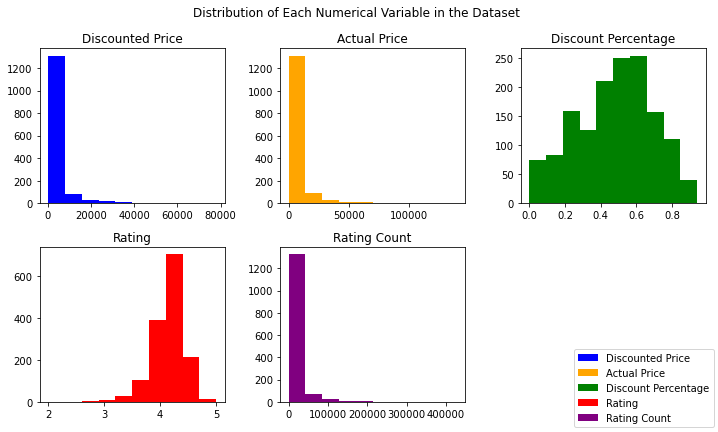

In [48]:
### A first simple visualization on the distribution for each numerical columns.
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs[0, 0].hist(amazon_clean['discounted_price'], color = 'blue')
axs[0, 0].set_title('Discounted Price')
axs[0, 1].hist(amazon_clean['actual_price'], color = 'orange')
axs[0, 1].set_title('Actual Price')
axs[0, 2].hist(amazon_clean['discount_percentage'], color = 'green')
axs[0, 2].set_title('Discount Percentage')
axs[1, 0].hist(amazon_clean['rating'], color = 'red')
axs[1, 0].set_title('Rating')
axs[1, 1].hist(amazon_clean['rating_count'], color = 'purple')
axs[1, 1].set_title('Rating Count')
axs[1, 2].remove()
fig.suptitle('Distribution of Each Numerical Variable in the Dataset')
fig.legend(['Discounted Price', 'Actual Price', 'Discount Percentage', 'Rating', 'Rating Count'], loc='lower right')
plt.tight_layout()
plt.show()

#### Product Category

We filter the largest 5 categories from the dataset which have at least 50 observations to analyze. We can find the elementary summary statistics for each grouped object.

In [49]:
amazon_clean.groupby("category").count().nlargest(5,"discounted_price")

,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_title
category,,,,,,,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233,233,233,233,231,233,233
Electronics|WearableTechnology|SmartWatches,76,76,76,76,76,76,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68,68,68,68,68,68,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63,63,63,63,63,63,63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52,52,52,52,52,52,52


In [50]:
amazon_group=amazon_clean.groupby("category")
group_A=amazon_group.get_group("Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables")
group_A.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,233.000000,233.000000,233.000000,233.000000,231.000000
mean,360.723691,906.022833,0.593777,4.151931,15358.510823
std,274.435216,509.773729,0.166040,0.229708,25590.685360
min,57.890000,199.000000,0.000000,3.000000,5.000000
25%,199.000000,499.000000,0.520000,4.000000,974.000000
50%,299.000000,845.000000,0.620000,4.200000,6255.000000
75%,399.000000,1099.000000,0.700000,4.300000,18757.000000
max,1599.000000,2100.000000,0.900000,5.000000,178817.000000


In [51]:
group_B=amazon_group.get_group("Electronics|WearableTechnology|SmartWatches")
group_B.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2339.697368,8554.763158,0.698158,4.025000,21637.842105
std,1511.808233,5012.872940,0.134845,0.302049,20554.690401
min,249.000000,999.000000,0.250000,2.800000,37.000000
25%,1599.000000,5999.000000,0.600000,3.900000,5683.750000
50%,1999.000000,7990.000000,0.745000,4.100000,17832.000000
75%,2574.000000,9999.000000,0.780000,4.200000,29471.250000
max,12000.000000,29999.000000,0.910000,4.500000,92588.000000


In [52]:
group_C=amazon_group.get_group("Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones")
group_C.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,15754.441176,20593.397059,0.232941,4.100000,36665.720588
std,8026.526403,10762.943471,0.087076,0.128132,71144.754784
min,6499.000000,7999.000000,0.000000,3.800000,125.000000
25%,9499.000000,13374.000000,0.190000,4.000000,9499.000000
50%,13999.000000,19249.000000,0.250000,4.100000,18998.000000
75%,17249.000000,24999.000000,0.280000,4.200000,26315.500000
max,44999.000000,74999.000000,0.490000,4.400000,313836.000000


In [53]:
group_D=amazon_group.get_group("Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions")
group_D.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,24840.190476,40132.841270,0.382857,4.209524,12067.920635
std,14207.599953,21840.697881,0.121899,0.169167,14074.047960
min,7299.000000,12999.000000,0.000000,3.400000,64.000000
25%,13744.500000,22945.000000,0.310000,4.200000,1532.500000
50%,21999.000000,34999.000000,0.390000,4.200000,6088.000000
75%,32494.500000,49999.500000,0.445000,4.300000,18775.500000
max,77990.000000,139900.000000,0.650000,4.700000,45238.000000


In [54]:
group_E=amazon_group.get_group("Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear")
group_E.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,976.173077,2960.076923,0.582692,3.898077,80864.211538
std,733.980010,2868.726423,0.194403,0.228799,96754.602884
min,149.000000,399.000000,0.000000,3.400000,206.000000
25%,453.500000,999.000000,0.492500,3.700000,9420.250000
50%,844.000000,1945.000000,0.625000,3.900000,42669.000000
75%,1399.000000,3992.250000,0.692500,4.100000,112264.500000
max,4790.000000,15990.000000,0.850000,4.200000,363713.000000


#### Regression

In [55]:
single_lr_model = linear_model.LinearRegression()
single_lr_model.fit(X = amazon_clean[amazon_clean.notnull().all(1)][['discount_percentage']], 
             y = amazon_clean[amazon_clean.notnull().all(1)][['rating_count']])
beta_0_single = lr_model.intercept_
beta_1_single = lr_model.coef_[0]
print(f"Fit model: rating_count = {beta_0_single} + {beta_1_single} discount_percentage")

Fit model: rating_count = [17242.01785005] + [2234.75171561] discount_percentage


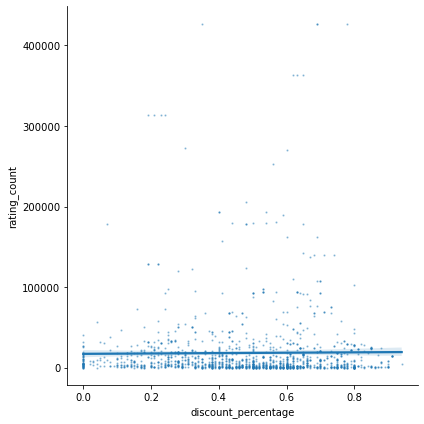

In [56]:
sns.lmplot(
    data=amazon_clean, x="discount_percentage", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)
plt.show()

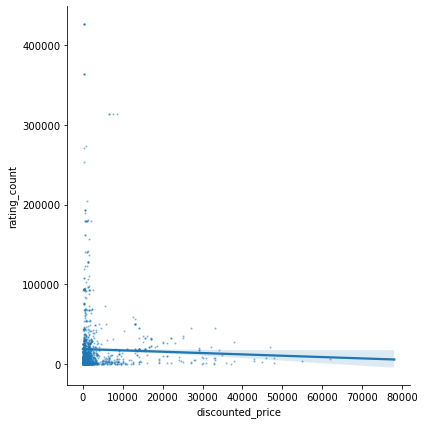

In [57]:
sns.lmplot(
    data=amazon_clean, x="discounted_price", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)
plt.show()

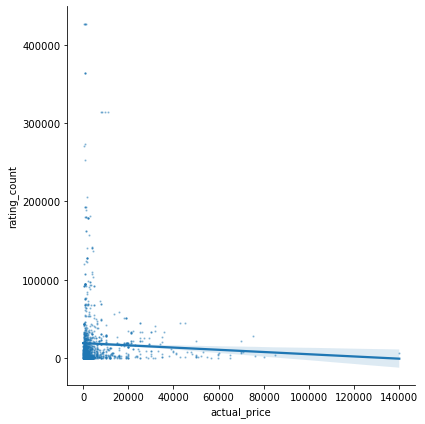

In [58]:
sns.lmplot(
    data=amazon_clean, x="actual_price", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)
plt.show()

In [6]:
multi_lr_model = linear_model.LinearRegression()

X_multi = amazon_clean[amazon_clean.notnull().all(1)][['discount_percentage', 'rating']]

multi_lr_model.fit(X = amazon_clean[amazon_clean.notnull().all(1)][['discount_percentage', 'rating']],
                   y = amazon_clean[amazon_clean.notnull().all(1)]["rating_count"])
beta_0_multi = multi_lr_model.intercept_
beta_1_multi = multi_lr_model.coef_[0]
beta_2_multi = multi_lr_model.coef_[1]

print(f"Fit model: rating_count = {beta_0_multi} + {beta_1_multi:.4f} discount_percentage + {beta_2_multi:.4f} rating")

Fit model: rating_count = -48821.76094653108 + 5517.6409 discount_percentage + 15744.0093 rating


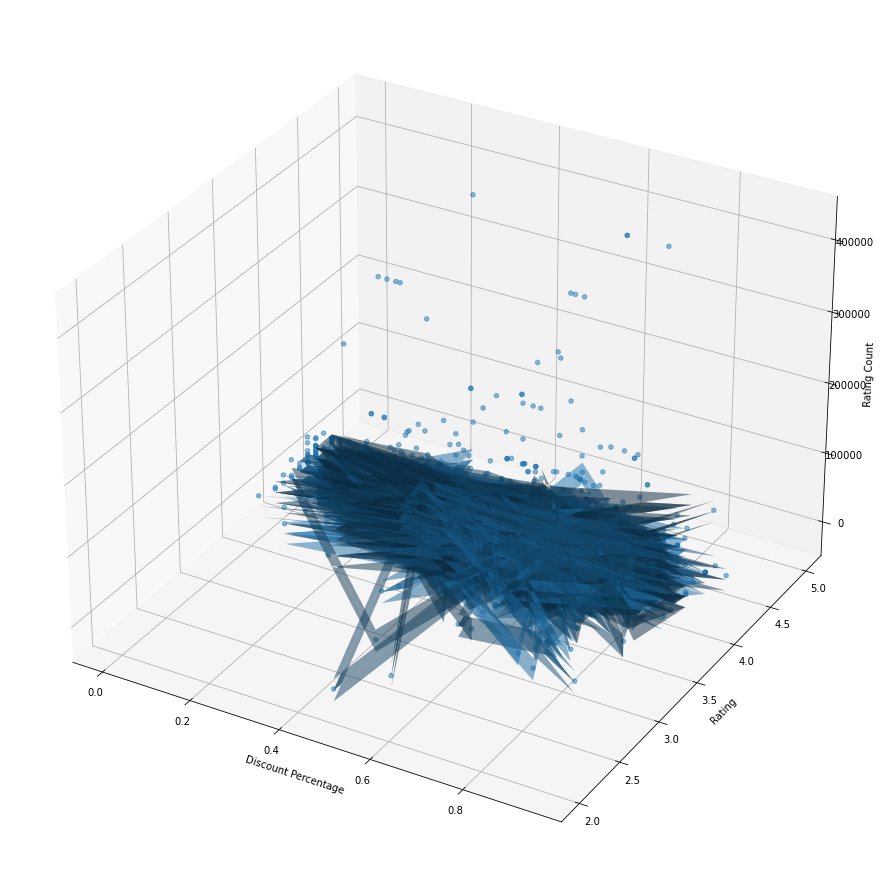

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Create outcome variable z with explanatory variables x and y
x = amazon_clean['discount_percentage']
y = amazon_clean['rating']
z = amazon_clean['rating_count']

# Fit values using the regression model
fit = beta_0_multi + beta_1_multi*x + beta_2_multi*y

# Create a 3D figure
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as points
ax.scatter(x, y, z, alpha =0.5)

# Plot fitted values
# x_range = np.arange(x.min(), x.max())
# y_range = np.arange(y.min(), y.max())
# X, Y = np.meshgrid(x_range, y_range)
# fit = beta_0_multi + beta_1_multi*X + beta_2_multi*Y
# ax.plot_surface(x, y, fit, alpha=0.5)

# Set the axis labels
ax.set_xlabel('Discount Percentage')
ax.set_ylabel('Rating')
ax.set_zlabel('Rating Count')

# Show the plot
plt.show()

## Implementation & Discussion:_____

## Conclusion:_____

## Reference:

* KARKAVELRAJA J. "Amazon Sales Dataset", Retrieved from [Kaggle](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) at https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset
* QuantEcon. "[Introduction to Economic Modeling and Data Science](https://datascience.quantecon.org/)." https://datascience.quantecon.org/
* [pandas documentation.](https://pandas.pydata.org/pandas-docs/stable/index.html), Jan 19, 2023 Version: 1.5.3, https://pandas.pydata.org/pandas-docs/stable/index.html 
* [Previous project](https://datascience.quantecon.org/theme/projects.html), from https://datascience.quantecon.org/theme/projects.html